In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset.shape

(100, 2)

In [3]:
X = dataset.iloc[:, :].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

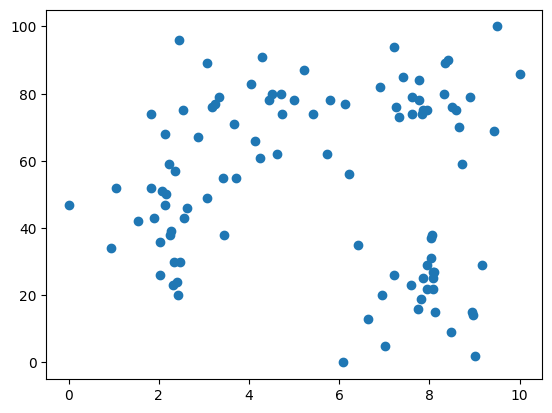

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

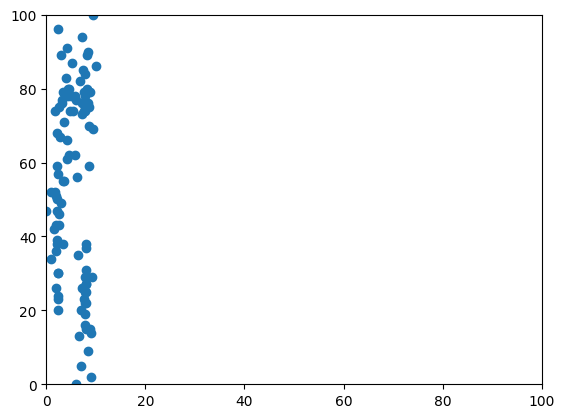

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X_trans[:5], X[:5]

(array([[ 0.68729921,  0.73538376],
        [-0.66687438,  0.04198891],
        [-0.77161709,  0.04198891],
        [-0.9100271 ,  1.35173473],
        [-0.8090252 ,  0.96651537]]),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

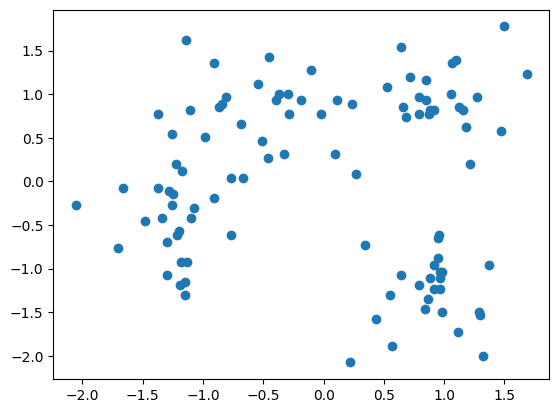

In [7]:
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.show()

In [10]:
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    kmeans.fit(X_trans)
    
    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, X, X_trans, centers_org

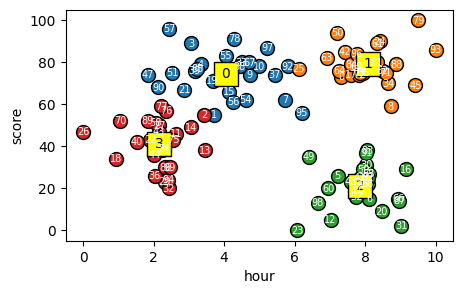

In [13]:
import matplotlib.pyplot as plt
import numpy as np
no = 4
kmeans, X_org, X_trans, centers_org = model_kmeans(no)
y_pred = kmeans.fit_predict(X_trans)

plt.figure(figsize=(5, 3))
for i in range(no):
    index = np.where(y_pred==i)
    x=X_org[index, 0]
    y=X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
    plt.xlabel('hour')
    plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=7)
plt.show()

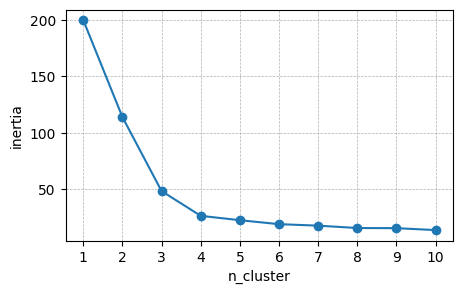

In [7]:
inertia_list=[] #각 점들에서 중심점까지의 거리 제곱의 합
for i in range(1, 11, 1):
    kmeans, X, X_trans, centers_org = model_kmeans(i)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
x = list(range(1, 11, 1))
y = inertia_list

plt.figure(figsize=(5, 3))
plt.plot(x, y, marker='o')
plt.xticks([x for x in range(1, 11, 1)])
plt.grid(True, ls='--', lw=0.5)
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

In [10]:
K=4
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X_trans)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [11]:
y_pred = kmeans.fit_predict(X_trans)
y_pred, X[:5]

(array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
        3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
        3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
        2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
        1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

In [12]:
dataset['cluster'] = y_pred
dataset.head()

,hour,score,cluster
0,7.33,73,1
1,3.71,55,0
2,3.43,55,3
3,3.06,89,0
4,3.33,79,0


In [13]:
import numpy as np
index = np.where(y_pred==1)
index


(array([ 0,  8, 17, 24, 25, 34, 35, 42, 45, 50, 61, 62, 63, 64, 69, 71, 72,
        73, 79, 81, 84, 88, 93, 96]),)

In [14]:
X[index, 1], X[index, 0]

(array([[ 73.,  59.,  74.,  90.,  77.,  70.,  75.,  85.,  69.,  94.,  89.,
          76.,  82.,  76.,  78.,  75.,  74.,  75., 100.,  80.,  79.,  79.,
          86.,  84.]]),
 array([[ 7.33,  8.73,  7.61,  8.42,  6.12,  8.66,  7.95,  7.42,  9.43,
          7.21,  8.34,  8.5 ,  6.91,  7.26,  7.76,  8.58,  7.83,  7.85,
          9.5 ,  8.33,  7.61,  8.89, 10.  ,  7.76]]))

In [15]:
for i in range(K):
    index = np.where(y_pred==i)
    print(i, X[index, 0], X[index, 1])

0 [[3.71 3.06 3.33 5.74 4.73 5.   4.13 3.67 2.86 4.5  5.43 4.44 3.17 1.83
  2.53 4.61 4.04 4.25 2.44 4.71 4.29 3.24 2.13 5.8  6.21 5.22]] [[55. 89. 79. 62. 74. 78. 66. 71. 67. 80. 74. 78. 76. 74. 75. 62. 83. 61.
  96. 80. 91. 77. 68. 78. 56. 87.]]
1 [[ 7.33  8.73  7.61  8.42  6.12  8.66  7.95  7.42  9.43  7.21  8.34  8.5
   6.91  7.26  7.76  8.58  7.83  7.85  9.5   8.33  7.61  8.89 10.    7.76]] [[ 73.  59.  74.  90.  77.  70.  75.  85.  69.  94.  89.  76.  82.  76.
   78.  75.  74.  75. 100.  80.  79.  79.  86.  84.]]
2 [[7.22 8.12 7.02 9.17 8.47 6.08 8.03 9.02 7.85 7.94 7.6  6.41 7.75 8.08
  7.94 6.96 8.11 8.94 8.08 7.81 8.07 8.06 8.97 8.03 6.65]] [[26. 15.  5. 29.  9.  0. 31.  2. 25. 22. 23. 35. 16. 27. 29. 20. 27. 15.
  22. 19. 25. 38. 14. 37. 13.]]
3 [[3.43 2.63 3.45 3.06 0.94 1.9  0.   2.16 2.24 2.31 2.43 2.03 1.53 2.14
  2.02 2.06 1.05 2.28 2.56 2.35 2.22 2.33 1.83 2.41 2.46]] [[55. 46. 38. 49. 34. 43. 47. 50. 38. 23. 20. 26. 42. 47. 36. 51. 52. 39.
  43. 57. 59. 30. 52. 24. 30.

In [16]:
filt = dataset['cluster']==0
dataset[filt].index

Index([ 1,  3,  4,  7,  9, 10, 15, 19, 21, 33, 37, 38, 39, 47, 51, 54, 55, 56,
       57, 67, 78, 85, 90, 92, 95, 97],
      dtype='int64')

In [17]:
y_pred

array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
       3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32)

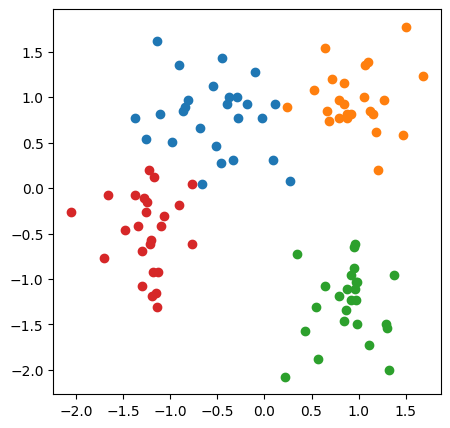

In [18]:
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_trans[index, 0]
    y=X_trans[index, 1]
    plt.scatter(x, y)
plt.show()

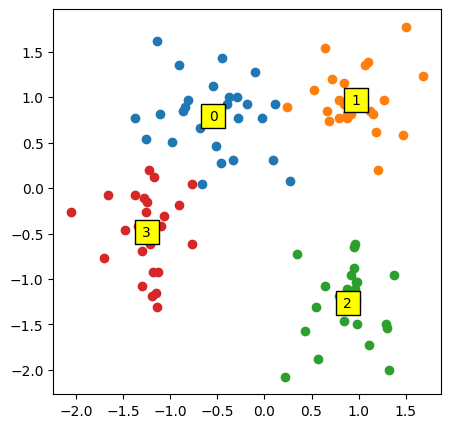

In [19]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_trans[index, 0]
    y=X_trans[index, 1]
    plt.scatter(x, y)
    cx = centers[i, 0]
    cy = centers[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
plt.show()

In [20]:
X_org = scaler.inverse_transform(X_trans)
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [21]:
centers_org = scaler.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

In [9]:
plt.figure(figsize=(5, 3))
for i in range(3):
    index = np.where(y_pred==i)
    x=X_org[index, 0]
    y=X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
    plt.xlabel('hour')
    plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=7)
plt.show()

NameError: name 'np' is not defined

<Figure size 500x300 with 0 Axes>

In [23]:
dataset.loc[31, :]

hour       9.02
score      2.00
cluster    2.00
Name: 31, dtype: float64

In [45]:
#KMeans 모델생성
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    kmeans.fit(X_trans)
    
    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, X, X_trans, centers_org

In [102]:
kmeans, X_org, X_trans, centers_org = model_kmeans(5) 
y_kmeans = kmeans.fit_predict(X_trans)
y_kmeans

array([1, 4, 3, 4, 4, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 4, 2, 4,
       3, 2, 1, 0, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 4, 3, 2, 1, 3,
       3, 1, 2, 4, 2, 2, 1, 4, 2, 2, 0, 0, 0, 4, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 4, 0, 1, 2, 1, 2, 2, 1, 4, 3, 2,
       1, 3, 4, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32)

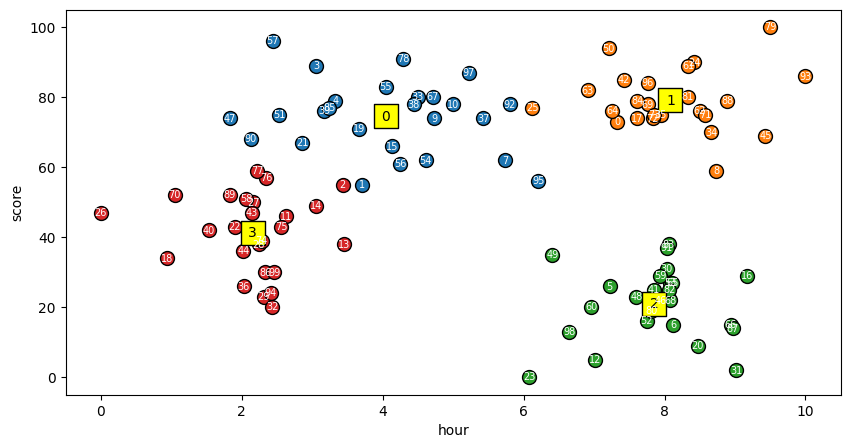

In [51]:
K=4
model, X_org, X_trans, centers_org = model_kmeans(K)
y_pred = model.fit_predict(X_trans)

plt.figure(figsize=(10, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_org[index, 0]
    y=X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
    plt.xlabel('hour')
    plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=7)
plt.show()

In [16]:
df_stu = pd.read_csv('data/학사관리/학생.csv')

In [17]:
df_pro = pd.read_csv('data/학사관리/교수.csv')

In [18]:
stu = list(df_stu['학생이름'])
pro = list(df_pro['교수이름'])
names = stu + pro
print(names)

['서연우', '김창덕', '이지행', '김형명', '이원구', '이재영', '박혜경', '김수정', '홍길동', '이병렬', '이재광', '강승일', '오문환']


In [19]:
df = pd.read_csv('data/KMeansData.csv')
df['name']=''
df.head(2)

,hour,score,name
0,7.33,73,
1,3.71,55,


In [75]:
import random
idx = random.randint(0, len(names)-1)
idx, names[idx]

(11, '강승일')

In [20]:
for i in range(len(df)):
    import random
    idx = random.randint(0, len(names)-1)
    df.loc[i, 'name']=names[idx]
df.tail()

,hour,score,name
95,6.21,56,김창덕
96,7.76,84,김형명
97,5.22,87,김수정
98,6.65,13,이원구
99,2.46,30,이재영


In [22]:
df.to_csv('data/K-평균.csv', index=False)

In [86]:
kmeans, X, X_trans, centers_org = model_kmeans(4)
y_pred = kmeans.fit_predict(X_trans)
df['cluster'] = y_pred
df.tail()

,hour,score,name,cluster
95,6.21,56,이지행,0
96,7.76,84,이원구,1
97,5.22,87,오문환,0
98,6.65,13,이병렬,2
99,2.46,30,이원구,3


In [101]:
for i in range(4):
    filt = df['cluster']==i
    df2 = df[filt]
    print(f'{i}그룹 {len(df2)}명...........................')
    index = df2.index

    count = 0
    for idx in index:
        print(f'{idx}:{df.loc[idx, "name"]}', end=',')
        count +=1
        if count%10==0: print()
    print()
    print('-' * 100)

0그룹 26명...........................
1:이지행,3:박혜경,4:박혜경,7:김수정,9:홍길동,10:김형명,15:김수정,19:오문환,21:김수정,33:이재광,
37:김창덕,38:강승일,39:김수정,47:강승일,51:이재광,54:김수정,55:김창덕,56:김형명,57:이원구,67:서연우,
78:서연우,85:이재광,90:이재영,92:서연우,95:이지행,97:오문환,
----------------------------------------------------------------------------------------------------
1그룹 24명...........................
0:이재영,8:서연우,17:이지행,24:강승일,25:김형명,34:이병렬,35:김수정,42:김형명,45:강승일,50:김창덕,
61:이지행,62:홍길동,63:이지행,64:이원구,69:이지행,71:이병렬,72:이재영,73:이병렬,79:이지행,81:이지행,
84:오문환,88:박혜경,93:서연우,96:이원구,
----------------------------------------------------------------------------------------------------
2그룹 25명...........................
5:김창덕,6:김창덕,12:이원구,16:이재영,20:박혜경,23:김창덕,30:박혜경,31:서연우,41:이지행,46:이재광,
48:김수정,49:강승일,52:홍길동,53:이병렬,59:김형명,60:홍길동,65:홍길동,66:김형명,68:강승일,80:이재광,
82:김형명,83:홍길동,87:김형명,91:오문환,98:이병렬,
----------------------------------------------------------------------------------------------------
3그룹 25명...........................
2:이원구,11:이지행,13:김창덕,14:강승일,18:박혜